### 1. Importing Required Modules and Packages

In [3]:
import os
import sys

sys.path.append('..')
os.environ["OMP_NUM_THREADS"] = '1'  # KMeans is not parallelized, so set to 1 thread

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.eblocks import Eblock, EblockDesign
import biotite.sequence as seq
from src.primer import DesignPrimers
from src.plot import Plot

%reload_ext autoreload
%autoreload 2

In [4]:
# write output to file
with open("tests/randomoutput/processed.txt", "w") as f:
    pass

### Test the eBlock design process

Testing 100_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Optimizing based on number of eBlocks ...
Lowest number of eBlocks: 3
Testing 101_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Testing 102_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...


c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Starting eBlock design ...
Testing 103_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Testing 104_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...


c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\Rosan\Anaco

Starting eBlock design ...
Testing 105_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Testing 106_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Testing 107_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Testing 108_A0QX55_mutations.txt
Calculating relative codon frequencies, based on the selected genome id U00096 ...
Starting eBlock design ...
Optimizing based on number of eBlocks ...
Lowest number of eBlocks: 3
Directory tests\randomoutput\clones\M21-K27 is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\D23-P30 is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\A33N is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput

c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\Rosan\Anaconda3\envs\test-eblocks\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


Directory tests\randomoutput\clones\K266W is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\Q273-FL is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\W275-E278 is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\D276-NVVSNNT is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\S295-FNLNSLL is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\S295-D304 is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\T301R-F333G-Q317H-Y341N is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\P302D is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\R303-P310 is not empty. Files might get overwritten or appended to.
Directory tests\randomoutput\clones\F309Y-A346Q-G336F-

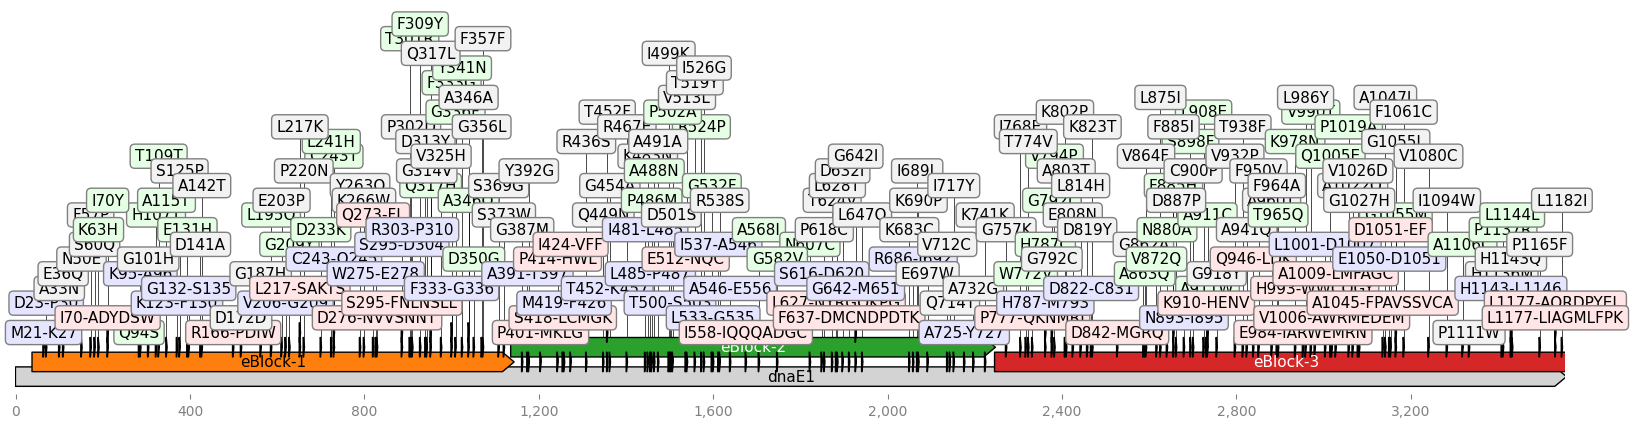

Testing 109_A0QX55_mutations.txt


IndexError: list index out of range

In [5]:
# Test all randomly generated mutations

processed = []
success_files = []
fail_files = []

randominput = r"tests/randominput"
output_dir = os.path.join("tests", "randomoutput")

# Read sequence
sequence_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'A0QX55.fasta')
vector_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'vector.dna')

gene_instance = Gene()
gene_instance.parse_sequence(sequence_file)
vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

# write output to file
with open("tests/randomoutput/processed.txt", "a") as f:

    for file in os.listdir(randominput):
        
        if file.endswith('.txt') and file not in processed:
            
            print(f"Testing {file}")

            mutations_file = file

            # Read mutations
            mutation_instance = Mutation()
            mutation_instance.parse_mutations(os.path.join("tests", "randominput", mutations_file))
            
            # Create Eblocks
            design_instance = EblockDesign(mutation_instance=mutation_instance,
                                        gene_instance=gene_instance,
                                        vector_instance=vector_instance,
                                        output_dir=output_dir,
                                        verbose=True,
                                        cost_optimization=False,
                                        amount_optimization=True)
            
            plot_instance = Plot(mutation_instance=mutation_instance,
                                eblocks_design_instance=design_instance,
                                vector_instance=vector_instance,
                                gene_instance=gene_instance,
                                output_dir=output_dir,
                                show=True)

            try:
                design_instance.run_design_eblocks()
                f.write(f"Success {file}\n")
                f.flush()
                plot_instance.plot_eblocks_mutations(figure_length=20,figure_width=5)
            except:
                fail_files.append(file)
                f.write(f"Fail {file}\n")
                f.flush()

In [ ]:
print(f"Success files: {success_files}")
print(f"Fail files: {fail_files}")

### 2. Loading and Analyzing the Gene Sequence

The desired mutations should be added to a txt file. 
Here, we create a Mutation() object and parse the specified mutations. 

In [6]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'Msmegmatis_DnaE1_mutations_N=27.txt')


mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed
mutation_instance.print_mutations()

The selected mutations are:
	Mutation  	S5K       
	Mutation  	V35Y      
	Mutation  	T84Y      
	Insert    	R204-FTSMM
	Mutation  	S251R     
	Combined  	S267M, D276I, D304L
	Deletion  	S285-Q294 
	Mutation  	D326M     
	Mutation  	A327G     
	Mutation  	I352C     
	Mutation  	P380Y     
	Mutation  	R416H     
	Mutation  	D428G     
	Mutation  	Y507V     
	Insert    	G535-DDVIIC
	Mutation  	E556R     
	Combined  	N593I, L639S, G635L, S616V
	Mutation  	D611G     
	Mutation  	P694P     
	Mutation  	Q716L     
	Mutation  	V867L     
	Deletion  	A899-V904 
	Combined  	V968Q, I1013Y
	Mutation  	L1002K    
	Mutation  	L1052E    
	Mutation  	F1061T    
	Mutation  	V1084M    
	Mutation  	L1157T    


Next, we read the gene sequence and the vector that contains our gene of interest.

In [7]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

sequence_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'A0QX55.fasta')
vector_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'vector.dna')


sequence_instance = Plasmid()
sequence_instance.parse_vector(vector_file)
sequence_instance.parse_sequence(sequence_file)

0000


We also define an output directory for the generated files and create a snapgene object for visualization

In [5]:
# Create a SnapGene instance to write the eBlocks features to a snapgene file

# Set output directory
output_dir = '0925-output'

snapgene_instance = SnapGene(sequence_instance=sequence_instance,
                             output_dir=output_dir)

We create an eBlockDesign instance that can initiate the design of the eblocks. Here, we choose as optimization method cost_optimization that aims to use as little basepairs as possible. Another option would be to do amount_optimization, that aims to cluster as many mutations as possible together, to get the lowest number of different eBlocks

In [6]:
# Create an Eblocks object based on the input mutations and the gene sequence

design_instance = EblockDesign(mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,
                               output_dir=output_dir,
                               verbose=True,
                               cost_optimization=False,
                               amount_optimization=True)

In [ ]:
# Create a Plots object and check the input vector

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=output_dir,
                     show=True)

# Check the input vector
plot_instance.plot_vector(figsize=(5, 5));

In [8]:
# TODO Add DnaE1 gene sequence to vector
# TODO What are the other things in the vector that do not have a name?

In our vector we can see that our vector contains the SacB gene, has an origin of replication and contains a CmR (chloramphenicol) resistance marker

In [9]:

# TODO Show eBlocks in vector as well
# TODO Add plasmid visaulization of eBlock features


# from Bio import SeqIO
# from Bio.Graphics import GenomeDiagram
# from Bio.SeqFeature import SeqFeature, FeatureLocation

# # Parse the plasmid sequence
# plasmid_seq_record = SeqIO.read("plasmid_sequence.fasta", "fasta")

# # Create a GenomeDiagram object
# gd_diagram = GenomeDiagram.Diagram("Plasmid Map")

# # Add the sequence track
# gd_track = gd_diagram.new_track(1, name="Plasmid")
# gd_feature_set = gd_track.new_set()

# # Add the plasmid sequence
# gd_feature_set.add_feature(SeqFeature(FeatureLocation(0, len(plasmid_seq_record))), color="black")

# # Parse the GFF3 file to extract features
# # Assuming you have a function parse_gff3() that returns feature information
# features = parse_gff3("plasmid_features.gff3")

# # Add the features to the plasmid map
# for feature in features:
#     start = feature.start
#     end = feature.end
#     name = feature.attributes["Name"]
#     gd_feature_set.add_feature(SeqFeature(FeatureLocation(start, end)), color="blue", label=True, label_position="middle", label_size=8, label_angle=0, label_strand=0, name=name)

# # Draw the plasmid map
# gd_diagram.draw(format="linear", pagesize=(15*len(plasmid_seq_record), 400), fragments=1)
# gd_diagram.write("plasmid_map.png", "png")


In [ ]:
# Run the eBlocks design and print the results

design_instance.run_design_eblocks()

In the process, for each mutation a different eBlock is created and a .gb file is made to easily view the clone in a sequence editor. 

In [ ]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [ ]:
sequence_file = 'files/A0QX55.fasta'
vector_file = 'files/vector.dna'

sequence_instance = Plasmid()
sequence_instance.parse_vector(vector_file)
sequence_instance.parse_sequence(sequence_file)

sequence_instance.description

In [23]:
from Bio import SeqIO

def read_single_fasta(fp: str) -> str:
    """
    This function reads a single fasta file and returns the sequence.
    """
    for num, record in enumerate(SeqIO.parse(fp, "fasta")):
        sequence = record.seq
        seqid = record.id
        if num > 0:
            raise ValueError("Please provide a single sequence in FASTA format.")
    return sequence, seqid

def read_single_fasta(fp: str) -> str:
    """
    This function reads a single fasta file and returns the sequence.
    """
    record = next(SeqIO.parse(fp, "fasta"))  # Read the first and only record
    sequence = record.seq
    seqid = record.id
    return sequence, seqid

In [ ]:
seq, seqid = read_single_fasta(sequence_file)
print(seq, seqid)
seq, seqid = read_single_fasta2(sequence_file)
print(seq, seqid)